# Часть 1. Сбор, предварительная обработка и анализ данных

#### Импортируем необходимые бибиотеки

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Пропписываем путь к датасету

In [166]:
FILENAME = './winequality-red.csv'

#### Создаем столбец с бинарным классом качества вина согласно условия

In [167]:
red_wine_data = pd.read_csv(FILENAME, delimiter=';')
print(red_wine_data.isnull().values.any())

count_of_rows, count_of_columns = red_wine_data.shape
print(count_of_rows, count_of_columns)

bin_quality = red_wine_data.apply(lambda row: int(row['quality'] >=6), axis=1)
red_wine_data['bin_quality'] = bin_quality

False
1599 12


#### Построим диаграмму распределения для сравнения с последующими результатами 

<Axes: xlabel='quality', ylabel='Count'>

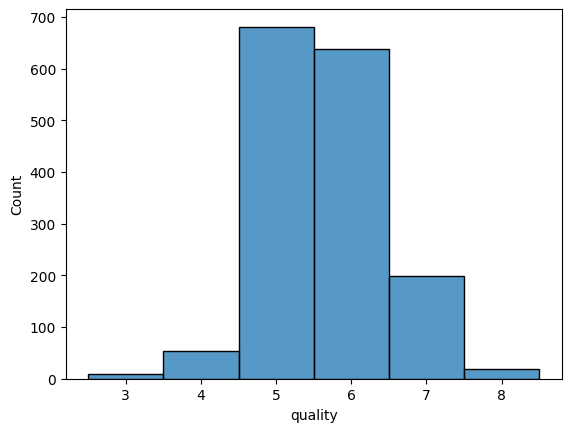

In [168]:
sns.histplot(x=red_wine_data['quality'], discrete=True)

#### Расчитываем 25 и 75 процентили, межквартильный диапазон и границы до выбросов, после чего подсчиытываем сами выбросы

In [169]:
q25 = red_wine_data['quality'].quantile(0.25)
q75 = red_wine_data['quality'].quantile(0.75)

diapazone = 1.5 * (q75 - q25)

lower_bound = q25 - diapazone
upper_bound = q75 + diapazone

count_of_emissions = red_wine_data[(red_wine_data['quality'] < lower_bound) | (red_wine_data['quality'] > upper_bound)].shape[0]

print(count_of_emissions)

28


#### Строим диаграмму распределения после очистки

<Axes: xlabel='quality', ylabel='Count'>

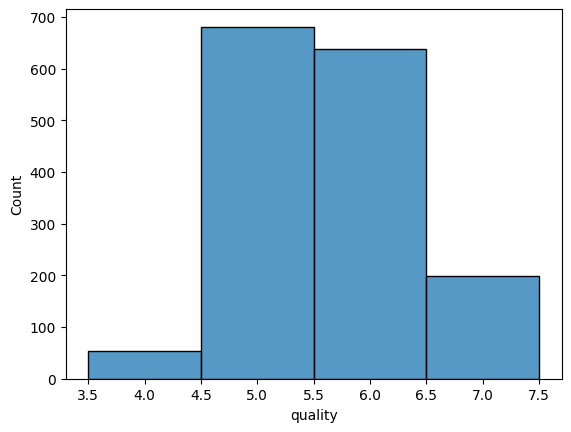

In [170]:
cleaned_red_wine_data = red_wine_data[(red_wine_data['quality'] >= lower_bound) & (red_wine_data['quality'] <= upper_bound)]
sns.histplot(x=cleaned_red_wine_data['quality'], discrete=True)


#### Строим диаграмму распределения для бинарного класса, а также подсчитываем долю "плохого" вина (вопрос из теста) 

Баланс классов: 734 - количество 0, 837 - количество 1
Процент плохого вина: 47


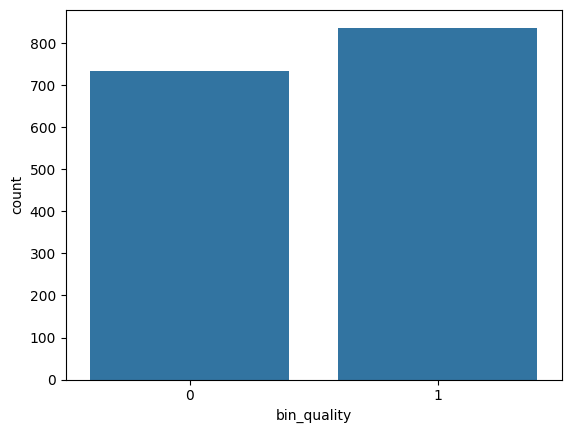

In [171]:
sns.countplot(x = cleaned_red_wine_data['bin_quality'])
zero_count = cleaned_red_wine_data['bin_quality'].value_counts()[0]
one_count = cleaned_red_wine_data['bin_quality'].value_counts()[1]
print(f'Баланс классов: {zero_count} - количество 0, {one_count} - количество 1')
print(f'Процент плохого вина: {round(100 * zero_count/(zero_count + one_count))}')

#### Считаем медианы

In [172]:
medians = cleaned_red_wine_data.median()
print(medians)

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.10000
quality                  6.00000
bin_quality              1.00000
dtype: float64


#### Строим "Ящик с усами"

<Axes: xlabel='quality'>

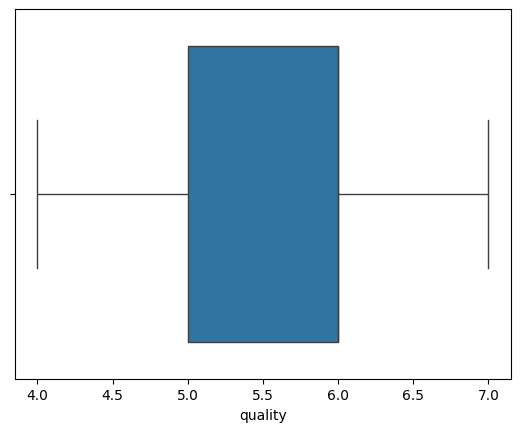

In [173]:
sns.boxplot(x=cleaned_red_wine_data['quality'])

# Часть 2 визуализация

#### Строим графики распределения признаков

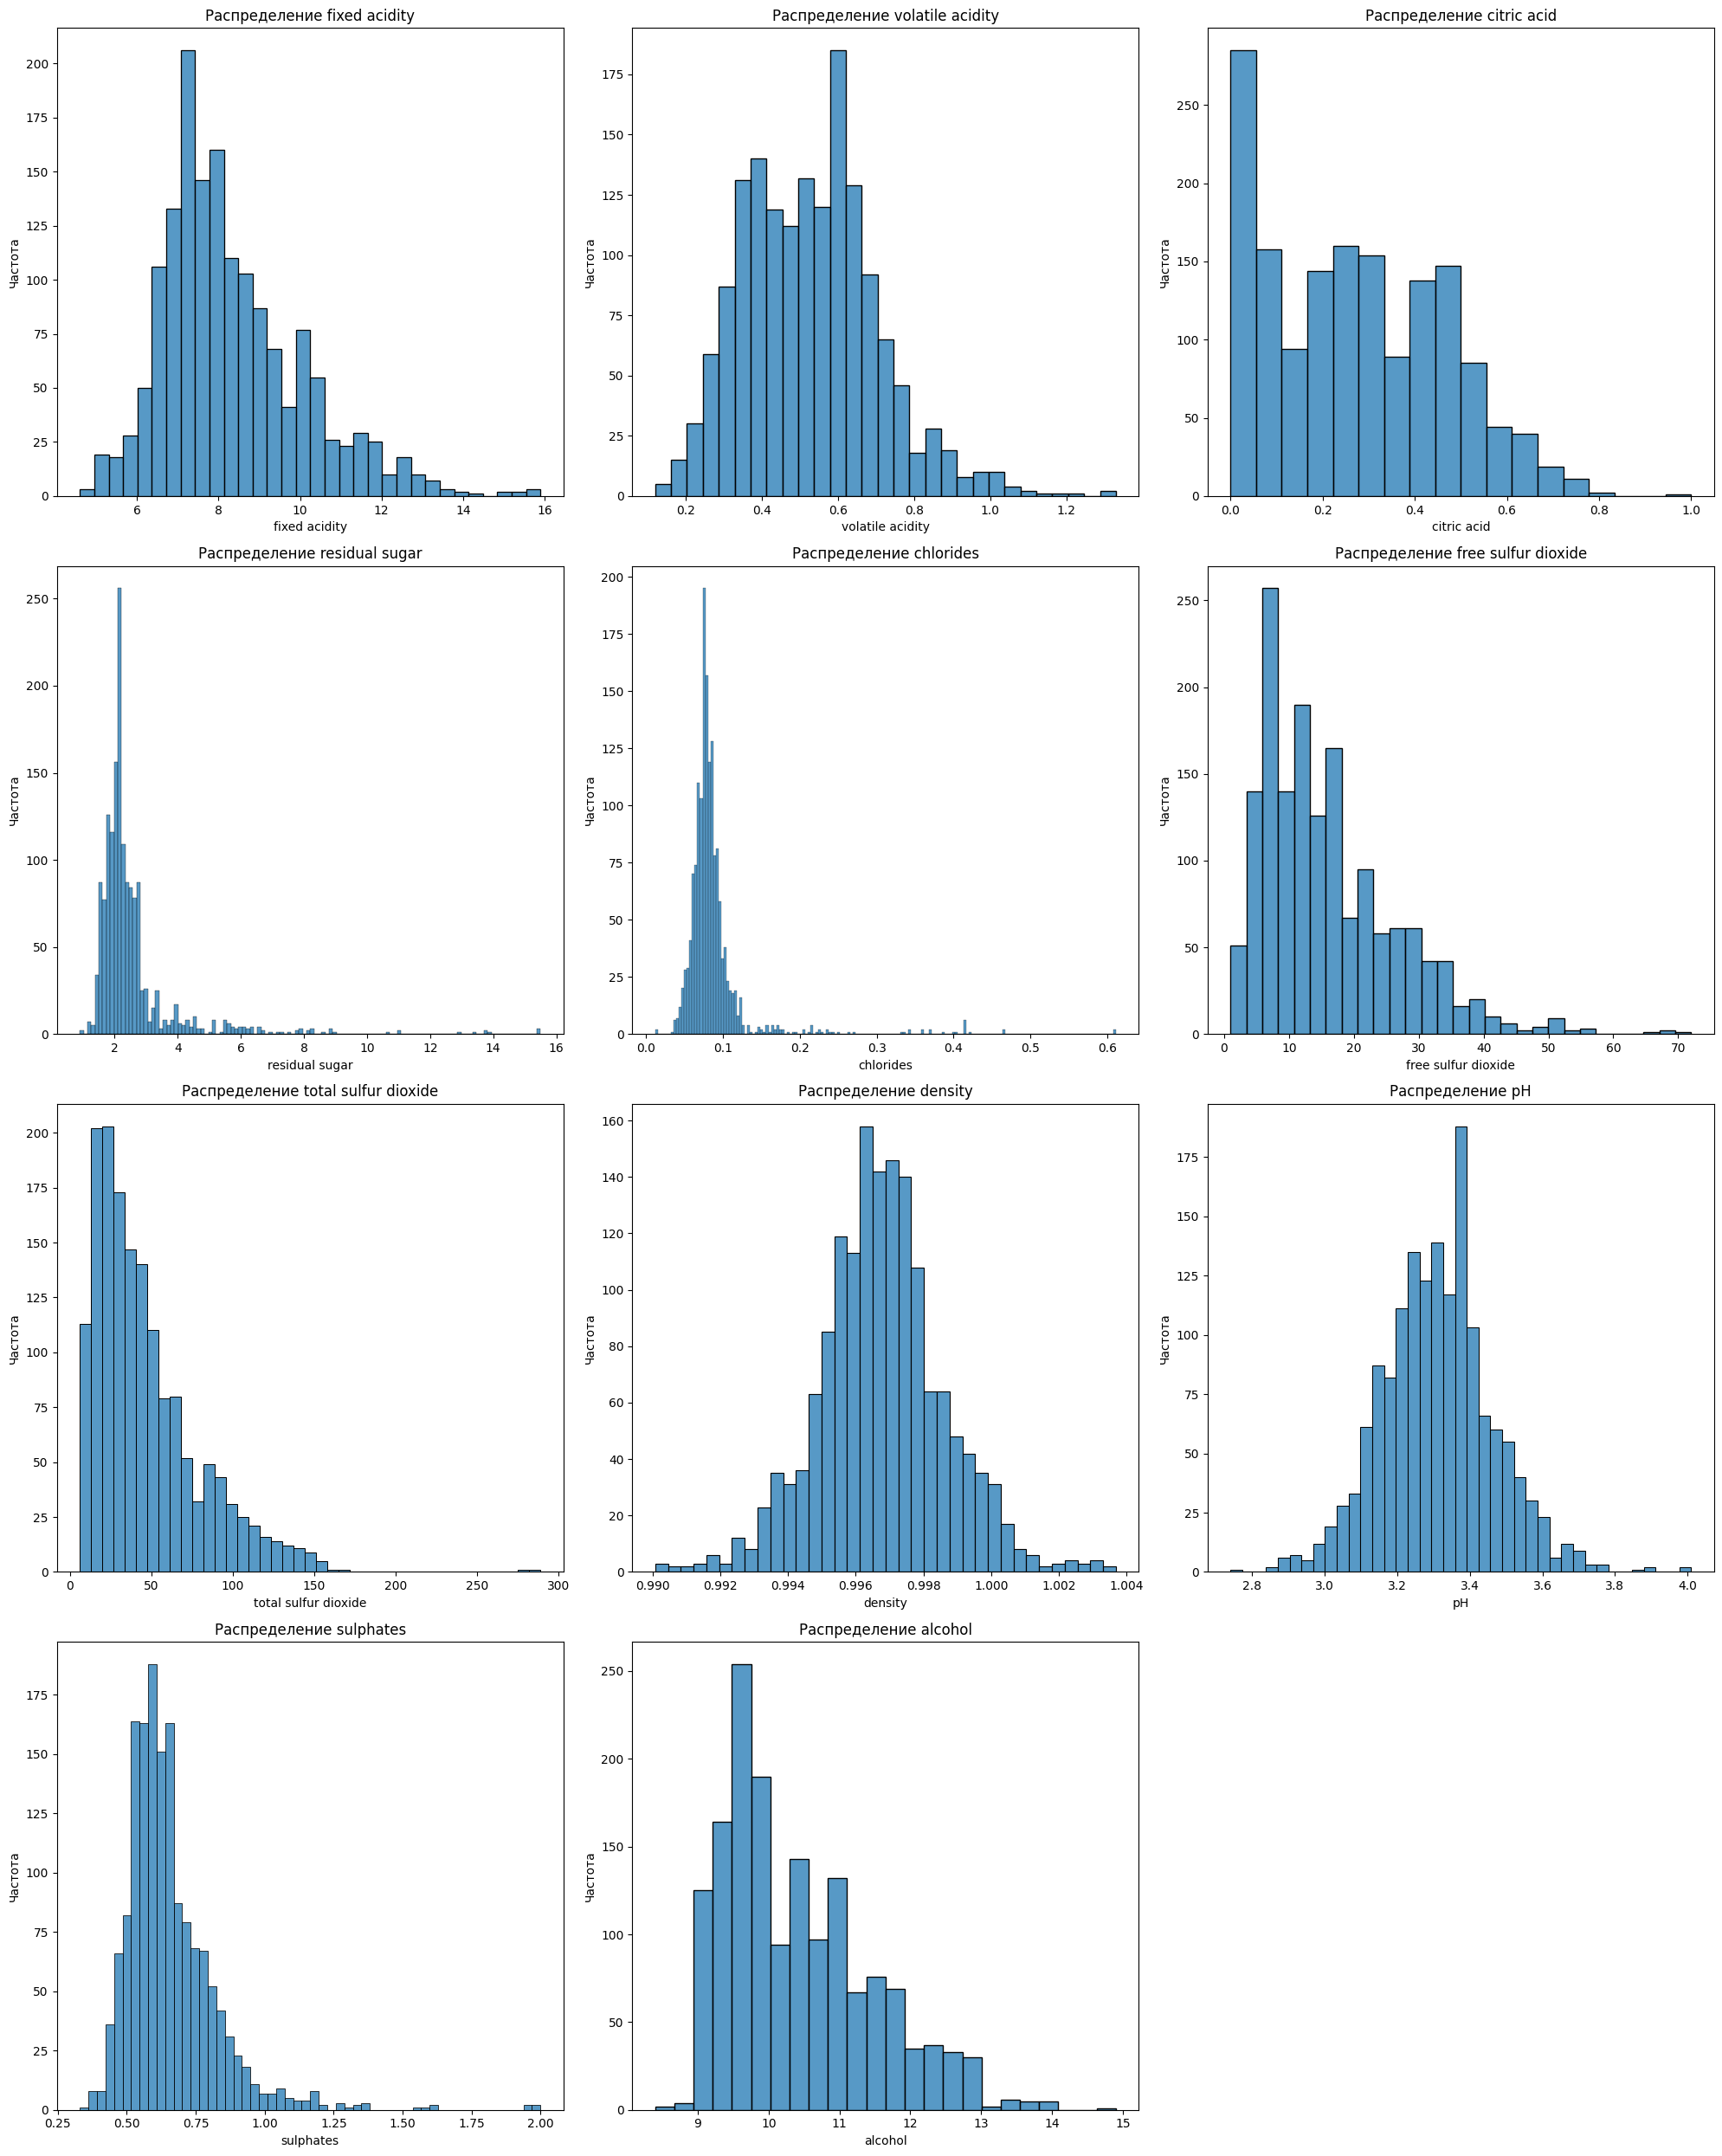

In [174]:
plt.figure(figsize=(20, 25))
to_draw = cleaned_red_wine_data.loc[:, cleaned_red_wine_data.columns != 'bin_quality']
to_draw = to_draw.loc[:, to_draw.columns != 'quality']

for i, column in enumerate(to_draw.columns):
    plt.subplot(4, 3, i + 1)  # Организация в сетку (4 строки и 3 столбца)
    sns.histplot(cleaned_red_wine_data[column])
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

#### Строим матрицу корреляции

<Axes: >

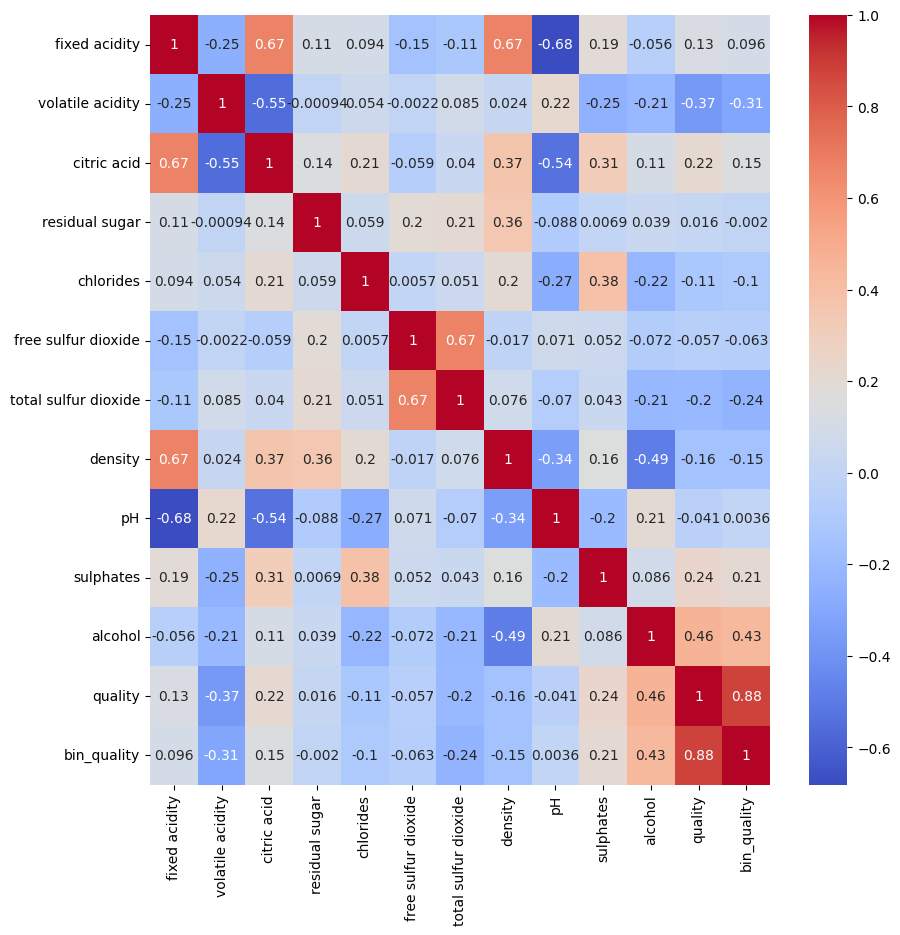

In [175]:
plt.figure(figsize=(10, 10))
correlation = cleaned_red_wine_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')